In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = './birthweight_low.xlsx'

birthweight = pd.read_excel(io=file, header=0,sheet_name=0)
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [132]:
birthweight.shape

(196, 18)

In [133]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [134]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [135]:
# displaying the LAST 5 rows of the DataFrame
birthweight.tail(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
191,30,12.0,5,12.0,38,NaN,5,7,3,2,1,0,1,0,0,0,1,4610
192,41,14.0,2,12.0,47,16.0,8,9,10,4,1,0,1,0,0,1,0,4660
193,33,15.0,2,15.0,38,13.0,8,8,0,1,0,1,0,0,1,0,0,4678
194,31,17.0,2,6.0,43,14.0,9,10,8,4,1,0,1,0,0,1,0,4791
195,39,17.0,2,10.0,38,12.0,8,9,0,0,0,0,0,1,1,0,0,4933


In [136]:
# INFOrmation about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


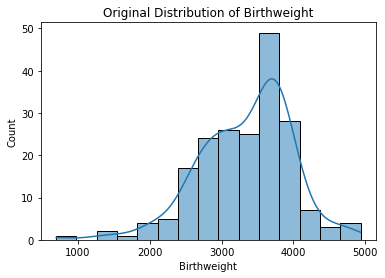

In [137]:
# developing a histogram using HISTPLOT
sns.histplot(data=birthweight, x='bwght', kde=True)
plt.title(label='Original Distribution of Birthweight')
plt.xlabel(xlabel='Birthweight')
plt.ylabel(ylabel='Count')
plt.show()

Birthweights are slightly skewed to the left as we start 
doing the initial exploration.

In [138]:
# descriptive statistics for numeric data
birthweight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


CONTINUOUS
----------
bwght
mage
fage

INTERVAL/COUNT
--------------
omaps ('do not interpret')
fmaps ('do not interpret')
monpre
npvis
cigs
drink

CATEGORICAL/OTHER
-----------------
meduc
feduc
male
mwhte
mblck
moth
fwhte
fblck
foth


In [139]:
continuous_data = ['bwght',
                    'mage',
                    'fage']

interval_data = ['monpre',
                'npvis',
                'cigs',
                'drink']
categorical_data = ['meduc',
                    'feduc',
                    'male',
                    'mwhte',
                    'mblck',
                    'moth',
                    'fwhte',
                    'fblck',
                    'foth']

In [140]:
# building a base model

# INSTANTIATING a model type
lm_practice  = smf.ols(formula = """  bwght ~ mage""",
                                     data = birthweight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     53.17
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.57e-12
Time:                        16:32:45   Log-Likelihood:                -1522.4
No. Observations:                 196   AIC:                             3049.
Df Residuals:                     194   BIC:                             3055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4509.0849    166.279     27.118      0.0

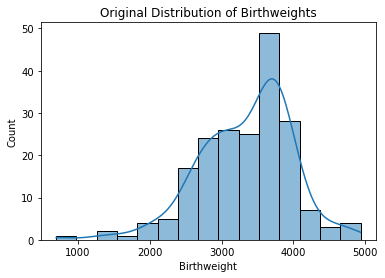

In [141]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweights")
plt.xlabel(xlabel = "Birthweight") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [142]:
# instantiating an imputation value for Number of Prenatal Visits (Count)

median = birthweight['npvis'].median()
birthweight['npvis'].fillna(value=median, inplace=True)
birthweight['npvis'].isnull().sum()

# instantiating an imputation value for Mother's Education (Categorical)
mode = birthweight['meduc'].mode()
birthweight['meduc'].fillna(value=median, inplace=True)
birthweight['meduc'].isnull().sum()

# instantiating an imputation value for Father's Education (Categorical)
mode = birthweight['feduc'].mode()
birthweight['feduc'].fillna(value=median, inplace=True)
birthweight['feduc'].isnull().sum()

# checking imputed values in column 'feduc'
birthweight['feduc'].head(n=10)

0    12.0
1    11.0
2    12.0
3    16.0
4    12.0
5     8.0
6    12.0
7    11.0
8    14.0
9    16.0
Name: feduc, dtype: float64

In [143]:
# log transforming Sale_Price and saving it to the dataset
birthweight['log_bwght']=np.log(birthweight['bwght'])

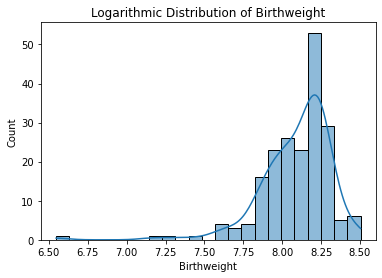

In [144]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = "log_bwght",
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "Birthweight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

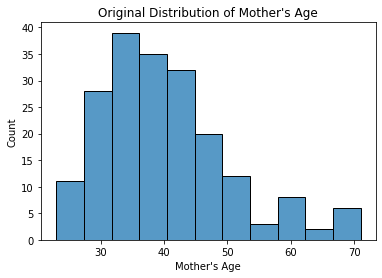

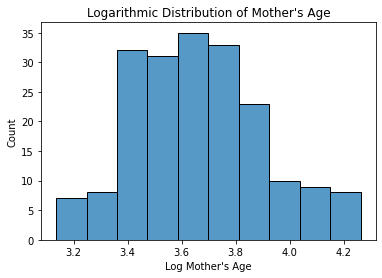

In [145]:
# using histograms to check Original Mother's Age for skewness
sns.histplot(data=birthweight,
            x = 'mage')


# rendering the plot
# title and axis labels
plt.title(label   = "Original Distribution of Mother's Age")
plt.xlabel(xlabel = "Mother's Age")
plt.ylabel(ylabel = "Count")
plt.show()

# trasforming Mother's Age into Logarithm
# log transforming Mother's Age and saving it to the dataset
birthweight['log_mage']=np.log(birthweight['mage'])

# using histograms to check features for skewness
sns.histplot(data=birthweight,
            x = 'log_mage')


# rendering the plot
# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's Age")
plt.xlabel(xlabel = "Log Mother's Age") 
plt.ylabel(ylabel = "Count")
plt.show()

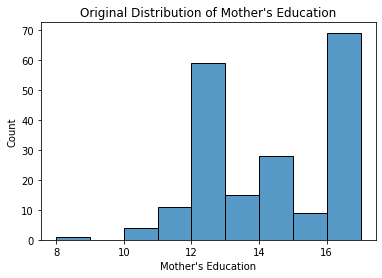

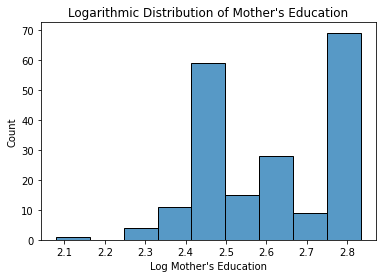

In [146]:
# using histograms to check Original Mother's Education for skewness
sns.histplot(data=birthweight,
            x = 'meduc')

# rendering the plot
# title and axis labels
plt.title(label   = "Original Distribution of Mother's Education")
plt.xlabel(xlabel = "Mother's Education")
plt.ylabel(ylabel = "Count")
plt.show()


# trasforming Mother's Edu into Logarithm
birthweight['log_meduc']=np.log(birthweight['meduc'])

# using histograms to check features for skewness
sns.histplot(data=birthweight,
            x = 'log_meduc')

# rendering the plot
# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's Education")
plt.xlabel(xlabel = "Log Mother's Education") 
plt.ylabel(ylabel = "Count")
plt.show()

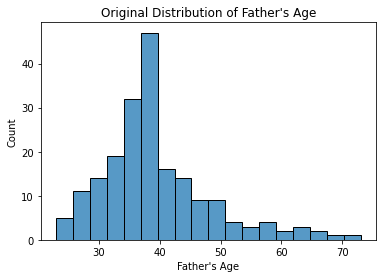

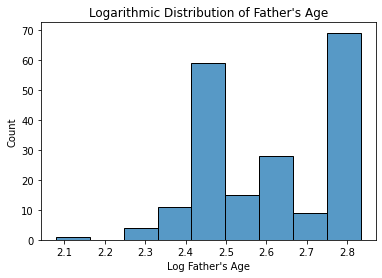

In [147]:
# using histograms to check Original Father's Age for skewness
sns.histplot(data=birthweight,
            x = 'fage')

# rendering the plot
# title and axis labels
plt.title(label   = "Original Distribution of Father's Age")
plt.xlabel(xlabel = "Father's Age")
plt.ylabel(ylabel = "Count")
plt.show()


# trasforming Father's Age into Logarithm
birthweight['log_fage']=np.log(birthweight['fage'])

# using histograms to check features for skewness
sns.histplot(data=birthweight,
            x = 'log_meduc')

# rendering the plot
# title and axis labels
plt.title(label   = "Logarithmic Distribution of Father's Age")
plt.xlabel(xlabel = "Log Father's Age") 
plt.ylabel(ylabel = "Count")
plt.show()

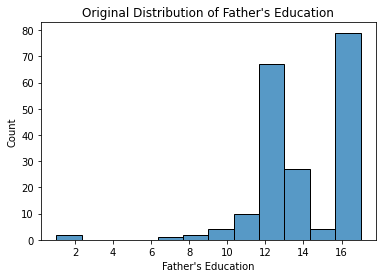

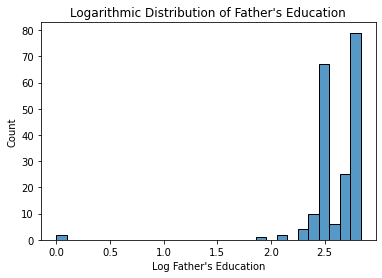

In [148]:
# using histograms to check Original Father's Education for skewness
sns.histplot(data=birthweight,
            x = 'feduc')

# rendering the plot
# title and axis labels
plt.title(label   = "Original Distribution of Father's Education")
plt.xlabel(xlabel = "Father's Education")
plt.ylabel(ylabel = "Count")
plt.show()


# trasforming Father's Edu into Logarithm
birthweight['log_feduc']=np.log(birthweight['feduc'])

# using histograms to check features for skewness
sns.histplot(data=birthweight,
            x = 'log_feduc')

# rendering the plot
# title and axis labels
plt.title(label   = "Logarithmic Distribution of Father's Education")
plt.xlabel(xlabel = "Log Father's Education") 
plt.ylabel(ylabel = "Count")
plt.show()


In [149]:
# trasforming remaining Y-variables into Logarithm
birthweight['log_npvis']=np.log(birthweight['npvis'] + 0.01)
birthweight['log_mwhte']=np.log(birthweight['mwhte'] + 0.01)
birthweight['log_fwhte']=np.log(birthweight['fwhte'] + 0.01)
birthweight['log_mblck']=np.log(birthweight['mblck'] + 0.01)
birthweight['log_fblck']=np.log(birthweight['fblck'] + 0.01)

In [150]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_bwght = smf.ols(formula = """log_bwght ~ log_mage""",
                        data = birthweight)


# telling Python to FIT the data to the blueprint
results = lm_bwght.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     46.28
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.24e-10
Time:                        16:32:48   Log-Likelihood:                 29.504
No. Observations:                 196   AIC:                            -55.01
Df Residuals:                     194   BIC:                            -48.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6174      0.225     42.709      0.0

Missing Value Analysis and Imputation

In [151]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'log_bwght', 'log_mage', 'log_meduc', 'log_fage', 'log_feduc', 'log_npvis', 'log_mwhte', 'log_fwhte', 'log_mblck', 'log_fblck'], dtype='object')

In [152]:
#displaying the columns to make sure we dropped the columns
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'log_bwght', 'log_mage', 'log_meduc', 'log_fage', 'log_feduc', 'log_npvis', 'log_mwhte', 'log_fwhte', 'log_mblck', 'log_fblck'], dtype='object')

In [153]:
# inscepting missing values
birthweight.isnull().sum(axis=0)

mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
log_meduc    0
log_fage     0
log_feduc    0
log_npvis    0
log_mwhte    0
log_fwhte    0
log_mblck    0
log_fblck    0
dtype: int64

In [154]:
# inscepting missing values
birthweight.isnull().sum(axis=0)

mage         0
meduc        0
monpre       0
npvis        0
fage         0
feduc        0
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_mage     0
log_meduc    0
log_fage     0
log_feduc    0
log_npvis    0
log_mwhte    0
log_fwhte    0
log_mblck    0
log_fblck    0
dtype: int64

Developing Trend-Based Features

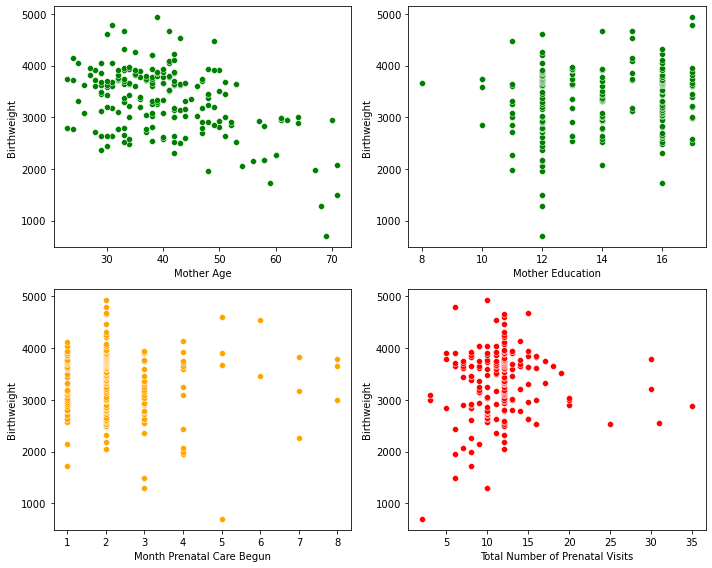

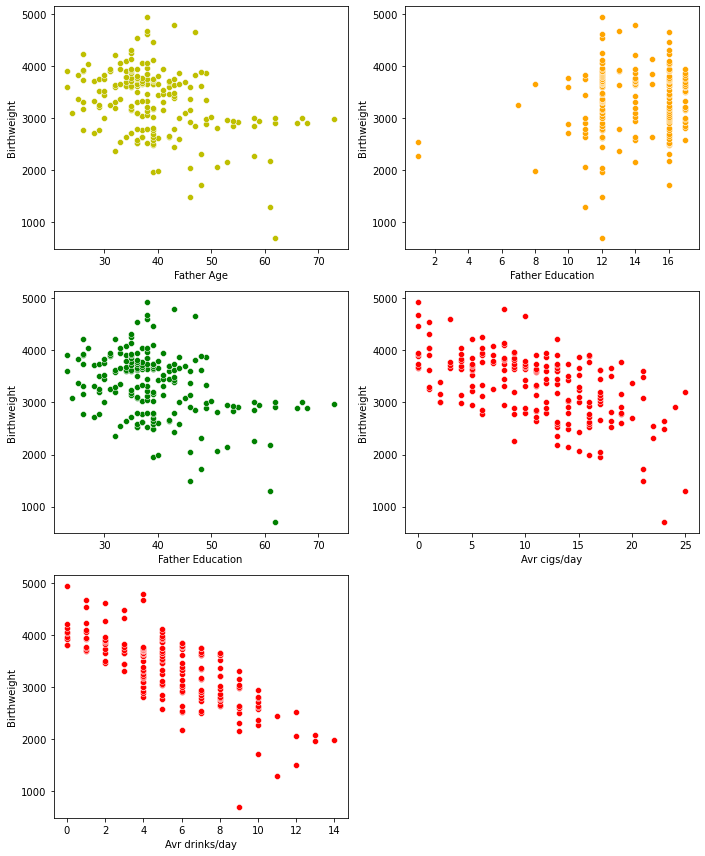

In [155]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birthweight['mage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Age')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birthweight['meduc'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother Education')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birthweight['monpre'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Month Prenatal Care Begun')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birthweight['npvis'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Total Number of Prenatal Visits')
plt.ylabel(ylabel = 'Birthweight')

# cleaning up the layout, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Age')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birthweight['feduc'],
                y = birthweight['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birthweight['fage'],
                y = birthweight['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father Education')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birthweight['cigs'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avr cigs/day')
plt.ylabel(ylabel = 'Birthweight')


########################


# developing a scatterplot
plt.subplot(3, 2, 5)
sns.scatterplot(x = birthweight['drink'],
                y = birthweight['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Avr drinks/day')
plt.ylabel(ylabel = 'Birthweight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [156]:
# placeholder variables for education
birthweight['has_uni_edu_m'] = 0
birthweight['has_uni_edu_f'] = 0



for index, value in birthweight.iterrows():
    

    # Mother education
    if birthweight.loc[index, 'meduc'] > 12:
        birthweight.loc[index, 'has_uni_edu_m'] = 1
        
        
    # Garage_Area
    if birthweight.loc[index, 'feduc'] > 12:
        birthweight.loc[index, 'has_uni_edu_f'] = 1
    

In [157]:
birthweight['has_uni_edu_f'].head(n=5)

0    0
1    0
2    0
3    1
4    0
Name: has_uni_edu_f, dtype: int64

In [158]:
birthweight['edu_parents'] = birthweight['has_uni_edu_m'] * birthweight['has_uni_edu_f']

In [159]:
birthweight.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage,log_meduc,log_fage,log_feduc,log_npvis,log_mwhte,log_fwhte,log_mblck,log_fblck,has_uni_edu_m,has_uni_edu_f,edu_parents
0,69,12.0,5,2.0,62,12.0,4,7,23,9,1,0,1,0,0,1,0,697,6.546785,4.234107,2.484907,4.127134,2.484907,0.698135,-4.60517,-4.60517,0.00995,0.00995,0,0,0
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,7.162397,4.219508,2.484907,4.110874,2.397895,2.303585,0.00995,0.00995,-4.60517,-4.60517,0,0,0
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,7.306531,4.262680,2.484907,3.828641,2.484907,1.793425,-4.60517,-4.60517,0.00995,0.00995,0,0,0
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,7.450080,4.077537,2.772589,3.871201,2.772589,2.080691,-4.60517,-4.60517,-4.60517,-4.60517,1,1,1
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,7.578657,3.871201,2.484907,3.663562,2.484907,1.793425,0.00995,0.00995,-4.60517,-4.60517,0,0,0


In [160]:
# placeholder variables for education
birthweight['does_smoke'] = 0
birthweight['does_drink'] = 0



for index, value in birthweight.iterrows():
    

    # Mother education
    if birthweight.loc[index, 'cigs'] > 1:
        birthweight.loc[index, 'does_smoke'] = 1
        
        
    # Garage_Area
    if birthweight.loc[index, 'drink'] > 1:
        birthweight.loc[index, 'does_drink'] = 1
        


In [161]:
birthweight['does_smoke'].head(n=5)

0    1
1    1
2    1
3    1
4    1
Name: does_smoke, dtype: int64

In [162]:
birthweight['cigs_drink'] = birthweight['cigs'] * birthweight['drink']
birthweight.head(n=5)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_bwght,log_mage,log_meduc,log_fage,log_feduc,log_npvis,log_mwhte,log_fwhte,log_mblck,log_fblck,has_uni_edu_m,has_uni_edu_f,edu_parents,does_smoke,does_drink,cigs_drink
0,69,12.0,5,2.0,62,12.0,4,7,23,9,1,0,1,0,0,1,0,697,6.546785,4.234107,2.484907,4.127134,2.484907,0.698135,-4.60517,-4.60517,0.00995,0.00995,0,0,0,1,1,207
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290,7.162397,4.219508,2.484907,4.110874,2.397895,2.303585,0.00995,0.00995,-4.60517,-4.60517,0,0,0,1,1,275
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490,7.306531,4.262680,2.484907,3.828641,2.484907,1.793425,-4.60517,-4.60517,0.00995,0.00995,0,0,0,1,1,252
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720,7.450080,4.077537,2.772589,3.871201,2.772589,2.080691,-4.60517,-4.60517,-4.60517,-4.60517,1,1,1,1,1,210
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956,7.578657,3.871201,2.484907,3.663562,2.484907,1.793425,0.00995,0.00995,-4.60517,-4.60517,0,0,0,1,1,221


In [163]:
birthweight.loc[:, ['mage', 'fage', 'monpre', 'npvis', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'edu_parents', 'cigs', 'drink', 'cigs_drink', 'bwght']].corr(method='pearson').round(decimals=2)

,mage,fage,monpre,npvis,mwhte,mblck,moth,fwhte,fblck,foth,edu_parents,cigs,drink,cigs_drink,bwght
mage,1.00,0.58,0.16,-0.05,0.01,-0.02,0.02,-0.08,0.04,0.05,-0.09,0.17,0.34,0.35,-0.46
fage,0.58,1.00,0.04,-0.06,0.04,-0.06,0.03,-0.03,-0.03,0.06,-0.01,0.17,0.29,0.28,-0.40
monpre,0.16,0.04,1.00,-0.34,0.08,0.13,-0.21,0.04,0.03,-0.07,-0.23,-0.06,0.02,0.01,-0.05
npvis,-0.05,-0.06,-0.34,1.00,0.04,-0.09,0.06,0.03,-0.07,0.03,0.14,0.04,-0.07,-0.06,0.06
mwhte,0.01,0.04,0.08,0.04,1.00,-0.48,-0.44,0.84,-0.44,-0.41,-0.26,0.03,0.16,0.11,-0.11
mblck,-0.02,-0.06,0.13,-0.09,-0.48,1.00,-0.57,-0.46,0.89,-0.44,-0.20,-0.20,-0.11,-0.17,0.13
moth,0.02,0.03,-0.21,0.06,-0.44,-0.57,1.00,-0.31,-0.50,0.83,0.45,0.17,-0.04,0.08,-0.02
fwhte,-0.08,-0.03,0.04,0.03,0.84,-0.46,-0.31,1.00,-0.53,-0.49,-0.20,-0.01,0.07,0.05,-0.04
fblck,0.04,-0.03,0.03,-0.07,-0.44,0.89,-0.50,-0.53,1.00,-0.48,-0.19,-0.19,-0.10,-0.18,0.12
foth,0.05,0.06,-0.07,0.03,-0.41,-0.44,0.83,-0.49,-0.48,1.00,0.40,0.21,0.02,0.13,-0.08


In [164]:
birthweight.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'log_bwght', 'log_mage', 'log_meduc', 'log_fage', 'log_feduc', 'log_npvis', 'log_mwhte', 'log_fwhte', 'log_mblck', 'log_fblck', 'has_uni_edu_m', 'has_uni_edu_f', 'edu_parents', 'does_smoke', 'does_drink', 'cigs_drink'], dtype='object')

In [165]:
# saving feature-rich dataset in Excel
birthweight.to_excel('./birthweight_feature_rich.xlsx',
                 index = False)

In [166]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """ bwght ~ mage +
                                cigs +
                                drink +
                                log_mwhte +
                                log_mblck +
                                log_fwhte +
                                log_fblck +
                                has_uni_edu_m +
                                log_npvis""",
                                    data = birthweight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     52.27
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           2.68e-46
Time:                        16:32:51   Log-Likelihood:                -1422.5
No. Observations:                 196   AIC:                             2865.
Df Residuals:                     186   BIC:                             2898.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4654.0221    228.089     20.404      0.000    4204.047    5103.997
mage            -13.6372      2.688     -5.072      0.000     -18.941      -8.333
cigs            -37.2184      4.564     -8.154      0.000     -46.223     -28.214
drink          -115.4639      9.636    -11.983      0.000    -134.473     -96.455
log_mwhte        13.0939     24.950      0.525      0.600     -36.128      62.316
log_mblck       -12.4715     27.241     -0.458      0.648     -66.213      41.270
log_fwhte       -11.4436     23.548     -0.486      0.628     -57.899      35.012
log_fblck        18.5381     28.559      0.649      0.517     -37.803      74.879
has_uni_edu_m   115.7890     56.147      2.062      0.041       5.023     226.555
log_npvis        90.4404     75.073      1.205      0.230     -57.663     238.544
==============================================================================
Omnibus:                        1.356   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.036
Skew:                          -0.021   Prob(JB):                        0.596
Kurtosis:                       3.354   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


In [168]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(['bwght'],
                               axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 33)
y-side: (147,)


Testing Data
------------
X-side: (49, 33)
y-side: (49,)



In [241]:
x_variables = ['cigs', 'drink', 'log_npvis']

# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula = """ bwght ~
                                cigs +
                                drink +
                                log_npvis """,
                                    data = birthweight)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     130.0
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           5.31e-46
Time:                        16:49:11   Log-Likelihood:                -1437.4
No. Observations:                 196   AIC:                             2883.
Df Residuals:                     192   BIC:                             2896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4026.6026    197.886     20.348      0.0

In [242]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ : , x_variables]


# preparing response variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
# save it as full to start exploring
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [243]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6592
OLS Testing Score  : 0.6995
OLS Train-Test Gap : 0.0403


In [244]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 3904.14)
('cigs', -40.45)
('drink', -123.21)
('log_npvis', 230.83)


In [245]:
import sklearn.linear_model # linear models

In [246]:
# INSTANTIATING a model object
# We can easily change to a new model (LASSO, KNN, RIDGE (press tab to see more))
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                                     normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_OLS)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_OLS, y_train_OLS).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_OLS, y_test_OLS).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6585
Lasso Testing Score  : 0.7028
Lasso Train-Test Gap : 0.0443


In [247]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3945.03)
('mage', -38.91)
('meduc', -121.07)
('monpre', 201.78)


In [248]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 3945.03)
('mage', -38.91)
('meduc', -121.07)
('monpre', 201.78)


In [249]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_OLS)


print('Training Score:', ard_model.score(x_train_OLS, y_train_OLS).round(4))
print('Testing Score :',  ard_model.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_OLS, y_train_OLS).round(4)
ard_test_score  = ard_model.score(x_test_OLS, y_test_OLS).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6588
Testing Score : 0.7054
ARD Train-Test Gap : 0.0466


In [250]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3977.18)
('mage', -39.72517)
('meduc', -123.61926)
('monpre', 197.72581)


In [251]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 3977.18)
('mage', -39.72517)
('meduc', -123.61926)
('monpre', 197.72581)


In [252]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
*Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.6592           0.6995
Lasso      0.6585           0.7028
ARD        0.6588           0.7054

